In [1]:
# reload
#%reset
%load_ext autoreload
%autoreload 2 

import warnings
import logging
import os

# DEBUG MODE
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings('ignore')
logging.getLogger('tensorflow').setLevel(logging.FATAL)
    
from s3l_training import s3l_training

Run with random seed:  561
GPU is available.
1
True
12.1
Concatenating runs:  range(1, 11)
Time to read csv file for run:  3.1397860050201416
Loaded run 1
Time to read csv file for run:  3.048069715499878
Loaded run 2
Time to read csv file for run:  3.0633342266082764
Loaded run 3
Time to read csv file for run:  3.007327079772949
Loaded run 4
Time to read csv file for run:  3.0007848739624023
Loaded run 5
Time to read csv file for run:  2.915087938308716
Loaded run 6
Time to read csv file for run:  2.943485975265503
Loaded run 7
Time to read csv file for run:  2.9424009323120117
Loaded run 8
Time to read csv file for run:  2.997819185256958
Loaded run 9
Time to read csv file for run:  2.917894124984741
Loaded run 10
pretrain_data, before removing rows that dont have traffic  (1799100, 102)
pretrain_data, after removing rows that dont have traffic  (205538, 102)
X_pretrain  (205086, 92)


Seed set to 42


HYPERPARAMETERS:  {'loss_fn': 'MSELoss', 'metric': 'r2_score', 'hidden_dim': 200, 'max_epochs': 100, 'batch_size': 128, 'optim_hparams': {'lr': 0.0001, 'weight_decay': 5e-05}, 'encoder_depth': 2, 'head_depth': 2, 'dropout_rate': 0.1, 'corruption_rate': 0.3}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


refresh rate:  10



  | Name             | Type       | Params | Mode 
--------------------------------------------------------
0 | task_loss_fn     | MSELoss    | 0      | train
1 | contrastive_loss | NTXentLoss | 0      | train
2 | model            | SCARF      | 240 K  | train
--------------------------------------------------------
240 K     Trainable params
0         Non-trainable params
240 K     Total params
0.963     Total estimated model params size (MB)


Epoch 99: 100%|███████████████████████████████████████████████████████| 1451/1451 [00:22<00:00, 65.03it/s, train_loss=0.180, val_loss=0.298]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|███████████████████████████████████████████████████████| 1451/1451 [00:22<00:00, 64.98it/s, train_loss=0.180, val_loss=0.298]


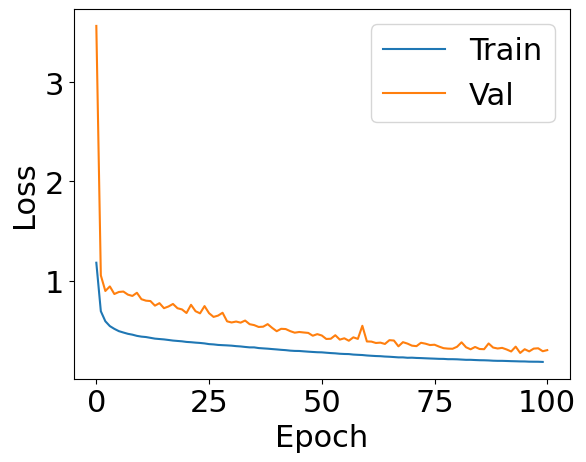

DONE SAVING PRETRAINED MODEL
   | Name                                             | Type        | Params | Mode 
------------------------------------------------------------------------------------------
0  | task_loss_fn                                     | MSELoss     | 0      | train
1  | contrastive_loss                                 | NTXentLoss  | 0      | train
2  | model                                            | SCARF       | 240 K  | train
3  | model._SCARF__encoder                            | MLP         | 59.2 K | train
4  | model._SCARF__encoder.linear_0                   | Linear      | 18.6 K | train
5  | model._SCARF__encoder.batchnorm_0                | BatchNorm1d | 400    | train
6  | model._SCARF__encoder.relu_0                     | ReLU        | 0      | train
7  | model._SCARF__encoder.dropout_0                  | Dropout     | 0      | train
8  | model._SCARF__encoder.linear_n_layers            | Linear      | 40.2 K | train
9  | model.pretraining_head   

In [2]:
s3l_training(pretrain=True, # if True First Phase training
             use_pretrained_model=False, # if True Second Phase learning
             pt_type='scarf', 
             pt_folder='FP8')